In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
import os
import re
from textblob import TextBlob
import time
from sklearn.feature_extraction.text import CountVectorizer

os.chdir(r'C:\Users\sriva\OneDrive\Desktop\ISM6930_Text_Analytics\Project_Files')

In [81]:
final_target_data = pd.read_pickle('final_target_data.pkl')
final_target_data.head()

,screen_name,date_time,location,text,cleaned_tweet_text,is_retweet,sentiment,classifier_text,streaming_platform,churn_likeliness
0,mattshoodie,2020-04-11 23:57:51,Hell’s Kitchen NYC,@MarvelAAge @disneyplus Bring it to @hulu I do...,marvelaage disneyplus bring hulu want pg devil...,False,Neutral,@disneyplus bring it to @hulu i do not want a ...,"hulu, disneyplus",0
1,sunkissed221,2020-04-11 23:49:12,"Rock Island, IL",@ryanvanasse @disneyplus @netflix Exactly! Jus...,ryanvanasse disneyplus netflix exactly commerc...,False,Positive,@disneyplus @netflix exactly just no commercials,"netflix, disneyplus",1
2,RickyM27B,2020-04-11 23:18:24,NaN,@susanahh_ @disneyplus Netflix does!,susanahh disneyplus netflix,False,Neutral,@disneyplus netflix does,"netflix, disneyplus",0
3,motorfckinghead,2020-04-11 23:18:15,Hemingway's hill,@RealDealKB @disneyplus On Netflix. But coming...,realdealkb disneyplus netflix coming soon disn...,False,Neutral,@disneyplus on netflix but coming soon to disn...,"netflix, disneyplus",0
4,SirWilliam118,2020-04-11 23:08:47,"San Antonio, TX",Really wish Wolf of Wall Street was on #Netfli...,really wish wolf wall street netflix date pres...,True,Positive,really wish wolf of wall street was on and my ...,"netflix, disneyplus",0


In [82]:
primevideo_df = pd.DataFrame(columns = final_target_data.columns)
netflix_df = pd.DataFrame(columns = final_target_data.columns)
hulu_df = pd.DataFrame(columns = final_target_data.columns)
disneyplus_df = pd.DataFrame(columns = final_target_data.columns)

grouped_streaming_platforms_df = final_target_data.groupby('streaming_platform')
# Iterated over a for loop to distribute tweets having more than one platforms mentioned amoung the platforms
for group in grouped_streaming_platforms_df.groups.keys():
    platforms_df = grouped_streaming_platforms_df.get_group(group)
    if len(group.split(',')) > 1:
        if re.search('primevideo', group):
            primevideo_df = pd.concat([primevideo_df, platforms_df], axis = 0, ignore_index = True)
        if re.search('netflix', group):
            netflix_df = pd.concat([netflix_df, platforms_df], axis = 0, ignore_index = True)
        if re.search('hulu', group):
            hulu_df = pd.concat([hulu_df, platforms_df], axis = 0, ignore_index = True)
        if re.search('disneyplus', group):
            disneyplus_df = pd.concat([disneyplus_df, platforms_df], axis = 0, ignore_index = True)

In [83]:
record1 = ['primevideo', primevideo_df['churn_likeliness'].value_counts()[0], primevideo_df['churn_likeliness'].value_counts()[1]]
record2 = ['netflix', netflix_df['churn_likeliness'].value_counts()[0], netflix_df['churn_likeliness'].value_counts()[1]]
record3 = ['hulu', hulu_df['churn_likeliness'].value_counts()[0], hulu_df['churn_likeliness'].value_counts()[1]]
record4 = ['disneyplus', disneyplus_df['churn_likeliness'].value_counts()[0], disneyplus_df['churn_likeliness'].value_counts()[1]]

In [84]:
churn_likeliness_dist_data = pd.DataFrame()
churn_likeliness_dist_data = churn_likeliness_dist_data.append([pd.Series(record1), pd.Series(record2), pd.Series(record3), pd.Series(record4)], ignore_index = True)
churn_likeliness_dist_data.columns = ['StreamingPlatform', 'NoChurnDetected', 'LikelyToChurn']
churn_likeliness_dist_data

,StreamingPlatform,NoChurnDetected,LikelyToChurn
0,primevideo,8533,260
1,netflix,24185,1640
2,hulu,21219,1477
3,disneyplus,2557,172


In [89]:
churn_likeliness_primevideo = pd.DataFrame(primevideo_df.churn_likeliness.value_counts())
churn_likeliness_primevideo['ChurnLikeliness'] = ['No Churn Detected', 'Likely To Churn']
churn_likeliness_primevideo.columns = ['CountPrimeVideo', 'ChurnLikelinessPrimeVideo']
churn_likeliness_netflix = pd.DataFrame(netflix_df.churn_likeliness.value_counts())
churn_likeliness_netflix['ChurnLikeliness'] = ['No Churn Detected', 'Likely To Churn']
churn_likeliness_netflix.columns = ['CountNetflix', 'ChurnLikelinessNetflix']
churn_likeliness_hulu = pd.DataFrame(hulu_df.churn_likeliness.value_counts())
churn_likeliness_hulu['ChurnLikeliness'] = ['No Churn Detected', 'Likely To Churn']
churn_likeliness_hulu.columns = ['CountHulu', 'ChurnLikelinessHulu']
churn_likeliness_disneyplus = pd.DataFrame(disneyplus_df.churn_likeliness.value_counts())
churn_likeliness_disneyplus['ChurnLikeliness'] = ['No Churn Detected', 'Likely To Churn']
churn_likeliness_disneyplus.columns = ['CountDisneyPlus', 'ChurnLikelinessDisneyPlus']
churn_likeliness_data = pd.concat([churn_likeliness_primevideo, churn_likeliness_netflix, churn_likeliness_hulu, churn_likeliness_disneyplus], axis = 1)
churn_likeliness_data.to_csv('churn_likeliness_data.csv')

In [86]:
import plotly.express as px

fig = px.pie(churn_likeliness_netflix, values='Count', names='ChurnLikeliness', title='Likely to Churn Rate')
fig.show()
#fig.write_image('ChurnLikelinessRate.jpg')

In [4]:
'''vectorizer = CountVectorizer(ngram_range=(2, 3))
analyzer = vectorizer.build_analyzer()

def getFailureOfService(text, churn_likeliness):
    churn_indicators = ['recommendations', 'finished', 'commercials', 'ads', 'interrupted', 'interruption', 'buffering', 'buffer', 'quality', 'content', 'show', 'subtitles', 'subtitle', 'payment', 'subscription', 'subscribers', 'login', 'comparison', 'never use', 'better']
    churn_reasons = []
    if churn_likeliness == 0:
        return 'no service failure'
    else:
        cleaned_text = ' '.join([w for w in text.split() if not re.search('^@\w+', w) and w != 'rt'])
        sentences = TextBlob(cleaned_text).sentences
        for s in sentences:
            for i in churn_indicators:
                if s not in churn_reasons and i in s.lower():
                    churn_reasons.append(s.string)
        if len(churn_reasons) > 0:
            return churn_reasons
        else:
            return 'reason unknown' '''         

"vectorizer = CountVectorizer(ngram_range=(2, 3))\nanalyzer = vectorizer.build_analyzer()\n\ndef getFailureOfService(text, churn_likeliness):\n    churn_indicators = ['recommendations', 'finished', 'commercials', 'ads', 'interrupted', 'interruption', 'buffering', 'buffer', 'quality', 'content', 'show', 'subtitles', 'subtitle', 'payment', 'subscription', 'subscribers', 'login', 'comparison', 'never use', 'better']\n    churn_reasons = []\n    if churn_likeliness == 0:\n        return 'no service failure'\n    else:\n        cleaned_text = ' '.join([w for w in text.split() if not re.search('^@\\w+', w) and w != 'rt'])\n        sentences = TextBlob(cleaned_text).sentences\n        for s in sentences:\n            for i in churn_indicators:\n                if s not in churn_reasons and i in s.lower():\n                    churn_reasons.append(s.string)\n        if len(churn_reasons) > 0:\n            return churn_reasons\n        else:\n            return 'reason unknown' "

In [5]:
final_target_data[final_target_data['churn_likeliness'] == 1].head()

,screen_name,date_time,location,text,cleaned_tweet_text,is_retweet,sentiment,classifier_text,streaming_platform,churn_likeliness
1,sunkissed221,2020-04-11 23:49:12,"Rock Island, IL",@ryanvanasse @disneyplus @netflix Exactly! Jus...,ryanvanasse disneyplus netflix exactly commerc...,False,Positive,@disneyplus @netflix exactly just no commercials,"netflix, disneyplus",1
7,Angryheadgaming,2020-04-11 22:50:35,NaN,@disneyplus Netflix is better Bruh,disneyplus netflix better bruh,False,Positive,@disneyplus netflix is better bruh,"netflix, disneyplus",1
10,Nellyfique,2020-04-11 21:21:09,NaN,@disneyplus when can we expect a same process ...,disneyplus expect process netflixfr subscripti...,False,Positive,@disneyplus when can we expect a same process ...,"netflix, disneyplus",1
15,NateLndqst,2020-04-11 20:17:41,mn,@PaulCharchian @hulu @amazon @netflix @disneyp...,paulcharchian hulu amazon netflix disneyplus e...,False,Negative,@hulu @netflix @disneyplus episodes in on dark...,"netflix, hulu, disneyplus",1
55,bhaguz_403,2020-04-11 16:02:06,NaN,RT @ankitkr0: Number of Subscribers for 📺 Plat...,ankitkr number subscribers platform netflix di...,True,Neutral,rt number of subscribers for platform @netflix...,"netflix, hulu, disneyplus",1


In [6]:
final_target_data.shape

(27404, 10)

In [7]:
likely_to_churn_data = final_target_data[final_target_data['churn_likeliness'] == 1].reset_index()
likely_to_churn_data.shape

(1713, 11)

In [8]:
likely_to_churn_data['streaming_platform'].value_counts()

netflix, hulu                            1324
primevideo, netflix                       141
netflix, disneyplus                        63
primevideo, netflix, hulu                  58
hulu, disneyplus                           39
netflix, hulu, disneyplus                  27
primevideo, hulu                           18
primevideo, disneyplus                     16
primevideo, netflix, disneyplus            16
primevideo, netflix, hulu, disneyplus      11
Name: streaming_platform, dtype: int64

In [9]:
primevideo_df = pd.DataFrame(columns = likely_to_churn_data.columns)
netflix_df = pd.DataFrame(columns = likely_to_churn_data.columns)
hulu_df = pd.DataFrame(columns = likely_to_churn_data.columns)
disneyplus_df = pd.DataFrame(columns = likely_to_churn_data.columns)

In [10]:
for i in likely_to_churn_data.index:
    platform_mentioned = likely_to_churn_data.loc[i, 'streaming_platform']
    list_of_values = likely_to_churn_data.values[i].tolist()
    columns = likely_to_churn_data.columns
    if 'primevideo' in platform_mentioned:
        #primevideo_df.append(pd.DataFrame(list_of_values, columns = columns), axis = 0)
        primevideo_df.loc[len(primevideo_df)] = list_of_values
    if 'netflix' in platform_mentioned:
        #netflix_df.append(pd.DataFrame(list_of_values, columns = columns), axis = 0)
        netflix_df.loc[len(netflix_df)] = list_of_values
    if 'hulu' in platform_mentioned:
        #hulu_df.append(pd.DataFrame(list_of_values, columns = columns), axis = 0)
        hulu_df.loc[len(hulu_df)] = list_of_values
    if 'disneyplus' in platform_mentioned:
        #disneyplus_df.append(pd.DataFrame(list_of_values, columns = columns), axis = 0)
        disneyplus_df.loc[len(disneyplus_df)] = list_of_values

In [11]:
primevideo_df.shape, netflix_df.shape, hulu_df.shape, disneyplus_df.shape

((260, 11), (1640, 11), (1477, 11), (172, 11))

In [12]:
likeliness_per_platform = []
streaming_platforms = ['primevideo', 'netflix', 'hulu', 'disneyplus']

for platform in (primevideo_df, netflix_df, hulu_df, disneyplus_df):    
    likeliness_per_platform.append(len(platform))
    
overall_platform_data = pd.DataFrame({'streaming_platform': streaming_platforms, 'likeliness_count': likeliness_per_platform})
overall_platform_data

,streaming_platform,likeliness_count
0,primevideo,260
1,netflix,1640
2,hulu,1477
3,disneyplus,172


### Rule Based Churn Detection

In [13]:
from textblob import TextBlob

def getPlatformMentioned(text):
    platform = []
    text = text.replace('prime video', 'primevideo')
    #text = text.replace(r'[Nn][Ee][Tt][Ff][Ll][Ii][Xx]+', 'netflix')
    text = text.replace('disney plus', 'disneyplus')
    if re.search(r'\b[Pp][Rr][Ii][Mm][Ee][Vv][Ii][Dd][Ee][Oo]\S*', text):
        platform.append('primevideo')
    if re.search(r'\b[Nn][Ee][Tt][Ff][Ll][Ii][Xx]\S*', text):
        platform.append('netflix')
    if re.search(r'\b[Hh][Uu][Ll][Uu]\S*', text):
        platform.append('hulu')
    if re.search(r'\b[Dd][Ii][Ss][Nn][Ee][Yy][Pp][Ll][Uu][Ss]\S*', text):
        platform.append('disneyplus')
    return platform


def getReason(text):
    text = text.replace('&amp;', '')
    text = text.replace('prime video', 'primevideo')
    text = text.replace('disney plus', 'disneyplus')
    text = text.replace('and', '.')
    text = text.replace(',', '.')
    text = text.replace('!', '.')
    text = text.replace(':', '.')
    text = text.replace(';', '.')
    churn_indicators = ['recommendations', 'finished', 'commercials', 'ads', 'interrupted', 'interruption', 'buffering', 'buffer', 'quality', 'content', 'show', 'subtitles', 'subtitle', 'payment', 'subscription', 'subscribers', 'login', 'comparison', 'never use', 'better']
    churn_reasons = []
    sentences = TextBlob(text).sentences
    for s in sentences:
        print(s)
        for i in churn_indicators:
            if s not in churn_reasons and i in s.lower():
                churn_reasons.append(s.string)
    if len(churn_reasons) > 0:
        return churn_reasons
    else:
        return 'reason unknown'


def getChurnPlatforms(text):
    text = text.replace('&amp;', '')
    text = text.replace('prime video', 'primevideo')
    text = text.replace('disney plus', 'disneyplus')
    text = text.replace('@NetflixIndia', 'netflix')
    text = text.replace('and', '.')
    text = text.replace(',', '.')
    text = text.replace('!', '.')
    platforms = getPlatformMentioned(text)
    sentences = TextBlob(text).sentences
    betterPlatform = []
    worsePlatform = []
    mentionedPlatforms = []
    for s in sentences:
        s = s.string
        # clean the sentence
        s = re.sub(r'\b[Pp][Rr][Ii][Mm][Ee][Vv][Ii][Dd][Ee][Oo]\S*', 'primevideo', s)
        s = re.sub(r'\b[Nn][Ee][Tt][Ff][Ll][Ii][Xx]', 'netflix', s)
        s = re.sub(r'\b[Hh][Uu][Ll][Uu]\S*', 'hulu', s)
        s = re.sub(r'\b[Dd][Ii][Ss][Nn][Ee][Yy][Pp][Ll][Uu][Ss]\S*', 'disneyplus', s)
        tokens = TextBlob(s.lower()).words

        # Special rules
        # Special Rule 1: better than....
        betterObj = re.search(r'\bbetter\S*', s, re.I)
        thanObj = re.search(r'\bthan\S*', s, re.I)
        isObj = re.search(r'\bis\S*', s, re.I)
        doesObj = re.search(r'\bdoes\S*', s, re.I)
        betterFlag = False
        thanFlag = False
        isFlag = False
        doesFlag = False
        if betterObj!= None and thanObj != None:
            for w in tokens:
                if w == 'better': betterFlag = True; continue
                elif w == 'than': thanFlag = True; continue
                for p in platforms:
                    if p.lower() == w and betterFlag == False:
                        betterPlatform.append(p)
                    elif p.lower() == w and thanFlag == True:
                        worsePlatform.append(p)
                        
        # Special Rule 2: is better or does better....
        elif betterObj != None and isObj != None or doesObj != None:
            print('No')
            for w in tokens:
                if w == 'better': betterFlag = True; continue
                elif w == 'is': isFlag = True; continue
                elif w == 'does': doesFlag = True; continue
                for p in platforms:
                    if p.lower() == w and betterFlag == False:
                        mentionedPlatforms.append(p)
            if len(mentionedPlatforms) > 0:
                betterPlatform = mentionedPlatforms[-1]
                worsePlatform = mentionedPlatforms[:-1]
    return betterPlatform, worsePlatform


def getChurnAndReason(text):
    platforms = getPlatformMentioned(text)
    reason = getReason(text)
    better_platform, worse_platform = getChurnPlatforms(text)
    print("Platforms:", platforms)
    print("Reason:", reason)
    print('Conclusion: ', better_platform, ' performed better than ',  worse_platform)
    return better_platform, worse_platform, reason
    # improve the reason algorithm: only pick out clause not sentense

##### Random Tweet 1: Rule successful

In [14]:
final_target_data.loc[81, 'text']

'RT @champagne0q: Hulu is better than Netflix'

In [15]:
getChurnAndReason(final_target_data.loc[81, 'text'])

RT @champagne0q.
Hulu is better than Netflix
Platforms: ['netflix', 'hulu']
Reason: ['Hulu is better than Netflix']
Conclusion:  ['hulu']  performed better than  ['netflix']


(['hulu'], ['netflix'], ['Hulu is better than Netflix'])

In [16]:
#final_target_data.to_excel('test_data.xlsx')

##### Random Tweet 2: Rule successful

In [17]:
final_target_data.loc[2886, 'text']

'RT @Jazmineeeeee01: Hulu is soooooo much better than Netflix'

In [18]:
getChurnAndReason(final_target_data.loc[2886, 'text'])

RT @Jazmineeeeee01.
Hulu is soooooo much better than Netflix
Platforms: ['netflix', 'hulu']
Reason: ['Hulu is soooooo much better than Netflix']
Conclusion:  ['hulu']  performed better than  ['netflix']


(['hulu'], ['netflix'], ['Hulu is soooooo much better than Netflix'])

##### Random Tweet 3: Rule successful

In [22]:
final_target_data.loc[2962, 'text']

'@NotVincentWhite lol that sucks Hulu is literally better than Netflix'

In [23]:
getChurnAndReason(final_target_data.loc[2962, 'text'])

@NotVincentWhite lol that sucks Hulu is literally better than Netflix
Platforms: ['netflix', 'hulu']
Reason: ['@NotVincentWhite lol that sucks Hulu is literally better than Netflix']
Conclusion:  ['hulu']  performed better than  ['netflix']


(['hulu'],
 ['netflix'],
 ['@NotVincentWhite lol that sucks Hulu is literally better than Netflix'])

##### Random Tweet 4: Rule successful

In [24]:
final_target_data.loc[4369, 'text']

'RT @loveydoveysteph: Hulu been hittin better than Netflix these days'

In [25]:
getChurnAndReason(final_target_data.loc[4369, 'text'])

RT @loveydoveysteph.
Hulu been hittin better than Netflix these days
Platforms: ['netflix', 'hulu']
Reason: ['Hulu been hittin better than Netflix these days']
Conclusion:  ['hulu']  performed better than  ['netflix']


(['hulu'], ['netflix'], ['Hulu been hittin better than Netflix these days'])

##### Random Tweet 5: Rule successful

In [19]:
final_target_data.loc[24703, 'text']

'hulu has way better QUALITY movies than the low budget cheap movies on PrimeVideo  😠'

In [20]:
getChurnAndReason(final_target_data.loc[24703, 'text'])

hulu has way better QUALITY movies than the low budget cheap movies on PrimeVideo  😠
Platforms: ['primevideo', 'hulu']
Reason: ['hulu has way better QUALITY movies than the low budget cheap movies on PrimeVideo  😠']
Conclusion:  ['hulu']  performed better than  ['primevideo']


(['hulu'],
 ['primevideo'],
 ['hulu has way better QUALITY movies than the low budget cheap movies on PrimeVideo  😠'])

##### Random Tweet 6: Rule successful

In [21]:
text = final_target_data.loc[26071, 'text']

In [22]:
getChurnAndReason(final_target_data.loc[26071, 'text'])[2]

@PrimeVideo is doing better than @NetflixIndia in this lockdown period.
Never expected #paradite to be featured in Prime...
Platforms: ['primevideo', 'netflix']
Reason: ['@PrimeVideo is doing better than @NetflixIndia in this lockdown period.']
Conclusion:  ['primevideo']  performed better than  ['netflix']


['@PrimeVideo is doing better than @NetflixIndia in this lockdown period.']

In [23]:
re.sub(r'[Nn][Ee][Tt][Ff][Ll][Ii][Xx]+', 'netflix', text)

'@PrimeVideo is doing better than @netflixIndia in this lockdown period. Never expected #paradite to be featured in Prime...'

In [24]:
likely_to_churn_data['more_preferred'] = likely_to_churn_data['text'].apply(lambda x : getChurnAndReason(x)[0])
likely_to_churn_data['less_preferred'] = likely_to_churn_data['text'].apply(lambda x : getChurnAndReason(x)[1])
likely_to_churn_data['user_remark'] = likely_to_churn_data['text'].apply(lambda x : getChurnAndReason(x)[2])

@ryanvanasse @disneyplus @netflix Exactly.
Just no commercials.
Platforms: ['netflix', 'disneyplus']
Reason: ['Just no commercials.']
Conclusion:  []  performed better than  []
@disneyplus Netflix is better Bruh
No
Platforms: ['netflix', 'disneyplus']
Reason: ['@disneyplus Netflix is better Bruh']
Conclusion:  netflix  performed better than  ['disneyplus']
@disneyplus when can we expect a same process as @NetflixFR  1 subscription .roid several screen ?
In order toi share Disney's magic ❤👍
Platforms: ['netflix', 'disneyplus']
Reason: ['@disneyplus when can we expect a same process as @NetflixFR  1 subscription .roid several screen ?']
Conclusion:  []  performed better than  []
@PaulCharchian @hulu @amazon @netflix @disneyplus 3 episodes in on Dark in German with English subtitles thank you
Platforms: ['netflix', 'hulu', 'disneyplus']
Reason: ['@PaulCharchian @hulu @amazon @netflix @disneyplus 3 episodes in on Dark in German with English subtitles thank you']
Conclusion:  []  performed 

In [25]:
likely_to_churn_data.head()

,index,screen_name,date_time,location,text,cleaned_tweet_text,is_retweet,sentiment,classifier_text,streaming_platform,churn_likeliness,more_preferred,less_preferred,user_remark
0,1,sunkissed221,2020-04-11 23:49:12,"Rock Island, IL",@ryanvanasse @disneyplus @netflix Exactly! Jus...,ryanvanasse disneyplus netflix exactly commerc...,False,Positive,@disneyplus @netflix exactly just no commercials,"netflix, disneyplus",1,[],[],[Just no commercials.]
1,7,Angryheadgaming,2020-04-11 22:50:35,NaN,@disneyplus Netflix is better Bruh,disneyplus netflix better bruh,False,Positive,@disneyplus netflix is better bruh,"netflix, disneyplus",1,netflix,[disneyplus],[@disneyplus Netflix is better Bruh]
2,10,Nellyfique,2020-04-11 21:21:09,NaN,@disneyplus when can we expect a same process ...,disneyplus expect process netflixfr subscripti...,False,Positive,@disneyplus when can we expect a same process ...,"netflix, disneyplus",1,[],[],[@disneyplus when can we expect a same process...
3,15,NateLndqst,2020-04-11 20:17:41,mn,@PaulCharchian @hulu @amazon @netflix @disneyp...,paulcharchian hulu amazon netflix disneyplus e...,False,Negative,@hulu @netflix @disneyplus episodes in on dark...,"netflix, hulu, disneyplus",1,[],[],[@PaulCharchian @hulu @amazon @netflix @disney...
4,55,bhaguz_403,2020-04-11 16:02:06,NaN,RT @ankitkr0: Number of Subscribers for 📺 Plat...,ankitkr number subscribers platform netflix di...,True,Neutral,rt number of subscribers for platform @netflix...,"netflix, hulu, disneyplus",1,[],[],[Number of Subscribers for 📺 Platform👇\n\n@net...


In [26]:
likely_to_churn_data = likely_to_churn_data.drop(['index', 'screen_name', 'date_time', 'location', 'text', 'cleaned_tweet_text'], axis = 1)

In [27]:
likely_to_churn_data.head()

,is_retweet,sentiment,classifier_text,streaming_platform,churn_likeliness,more_preferred,less_preferred,user_remark
0,False,Positive,@disneyplus @netflix exactly just no commercials,"netflix, disneyplus",1,[],[],[Just no commercials.]
1,False,Positive,@disneyplus netflix is better bruh,"netflix, disneyplus",1,netflix,[disneyplus],[@disneyplus Netflix is better Bruh]
2,False,Positive,@disneyplus when can we expect a same process ...,"netflix, disneyplus",1,[],[],[@disneyplus when can we expect a same process...
3,False,Negative,@hulu @netflix @disneyplus episodes in on dark...,"netflix, hulu, disneyplus",1,[],[],[@PaulCharchian @hulu @amazon @netflix @disney...
4,True,Neutral,rt number of subscribers for platform @netflix...,"netflix, hulu, disneyplus",1,[],[],[Number of Subscribers for 📺 Platform👇\n\n@net...


In [28]:
primevideo_more_preferred = 0
primevideo_less_preferred = 0
primevideo_user_remark = []
netflix_more_preferred = 0
netflix_less_preferred = 0
netflix_user_remark = []
hulu_more_preferred = 0
hulu_less_preferred = 0
hulu_user_remark = []
disneyplus_more_preferred = 0
disneyplus_less_preferred = 0
disneyplus_user_remark = []

for i in likely_to_churn_data.index:
    more_preferred = likely_to_churn_data.loc[i, 'more_preferred']
    less_preferred = likely_to_churn_data.loc[i, 'less_preferred']
    user_remark = likely_to_churn_data.loc[i, 'user_remark']
    
    if 'primevideo' in less_preferred:
        primevideo_less_preferred += 1
        primevideo_user_remark.append(user_remark)
    elif 'primevideo' in more_preferred:
        primevideo_more_preferred += 1
      
    if 'netflix' in less_preferred:
        netflix_less_preferred += 1
        netflix_user_remark.append(user_remark)
    elif 'netflix' in more_preferred:
        netflix_more_preferred += 1
        
    if 'hulu' in less_preferred:
        hulu_less_preferred += 1
        hulu_user_remark.append(user_remark)
    elif 'hulu' in more_preferred:
        hulu_more_preferred += 1
      
    if 'disneyplus' in less_preferred:
        disneyplus_less_preferred += 1
        disneyplus_user_remark.append(user_remark)
    elif 'disneyplus' in more_preferred:
        disneyplus_more_preferred += 1

In [29]:
print(primevideo_more_preferred, primevideo_less_preferred)

12 3


In [30]:
print(netflix_more_preferred, netflix_less_preferred)

48 259


In [31]:
print(hulu_more_preferred, hulu_less_preferred)

240 47


In [32]:
print(disneyplus_more_preferred, disneyplus_less_preferred)

5 9


In [33]:
streaming_platforms = ['primevideo', 'netflix', 'hulu', 'disneyplus']
overall_performance_data = pd.DataFrame(columns = ['StreamingPlatform', 'MorePreferredCount', 'LessPreferredCount'])

In [34]:
overall_performance_data['StreamingPlatform'] = streaming_platforms
overall_performance_data['MorePreferredCount'] = [primevideo_more_preferred, netflix_more_preferred, hulu_more_preferred, disneyplus_more_preferred]
overall_performance_data['LessPreferredCount'] = [primevideo_less_preferred, netflix_less_preferred, hulu_less_preferred, disneyplus_less_preferred]
overall_performance_data

,StreamingPlatform,MorePreferredCount,LessPreferredCount
0,primevideo,12,3
1,netflix,48,259
2,hulu,240,47
3,disneyplus,5,9


In [35]:
overall_performance_data['MorePreferredPercentage'] = ''
overall_performance_data['LessPreferredPercentage'] = ''
for i in overall_performance_data.index:
    more_preferred_count = overall_performance_data.loc[i, 'MorePreferredCount']
    less_preferred_count = overall_performance_data.loc[i, 'LessPreferredCount']
    total_count = more_preferred_count + less_preferred_count
    overall_performance_data.loc[i, 'MorePreferredPercentage'] = more_preferred_count/total_count
    overall_performance_data.loc[i, 'LessPreferredPercentage'] = less_preferred_count/total_count
overall_performance_data

,StreamingPlatform,MorePreferredCount,LessPreferredCount,MorePreferredPercentage,LessPreferredPercentage
0,primevideo,12,3,0.8,0.2
1,netflix,48,259,0.156352,0.843648
2,hulu,240,47,0.836237,0.163763
3,disneyplus,5,9,0.357143,0.642857


In [36]:
overall_performance_data.to_csv('overall_performace_data.csv')

In [54]:
import plotly.graph_objects as go

#colors = ('#00A8E1', '#E50914', '#66AA33', '#113CCF')
fig = go.Figure(data = [go.Bar(name = 'MorePreferred', x = overall_performance_data['StreamingPlatform'], y = overall_performance_data['MorePreferredPercentage']),\
                      go.Bar(name = 'LessPreferred', x = overall_performance_data['StreamingPlatform'], y = overall_performance_data['LessPreferredPercentage'])], )

fig.update_layout(barmode = 'group', xaxis_title = 'Web Streaming Platforms', yaxis_title = 'Percentage', title = 'More Preferred vs Less Preferred % of the Streaming Platforms')
fig.show()
fig.write_image('PlatformPerformanceBarplot.jpg')

In [55]:
fig = px.pie(overall_performance_data, values = 'MorePreferredCount', names = 'StreamingPlatform')
fig.show()

In [38]:
primevideo_user_remarks = ' '.join([' '.join(line) for line in primevideo_user_remark])
netflix_user_remarks = ' '.join([' '.join(line) for line in netflix_user_remark])
hulu_user_remarks = ' '.join([' '.join(line) for line in hulu_user_remark])
disneyplus_user_remarks = ' '.join([' '.join(line) for line in disneyplus_user_remark])

In [39]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tweet_tokenizer = TweetTokenizer()
word_lemmatizer = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')

def cleanedRemarksCorpus(corpus):
    text = ' '.join([c for c in corpus])
    tokenized_words = tweet_tokenizer.tokenize(corpus)
    tokenized_words = [w for w in tokenized_words if w.isalpha()]
    tokenized_words = [w for w in tokenized_words if len(w) > 2]
    tokenized_words = [w.lower() for w in tokenized_words]
    tokenized_words = [w for w in tokenized_words if w not in ['amp', 'u', 'http', 'https', 'primevideo', 'netflix', 'hulu', 'disneyplus']]    
    tokenized_words = [w for w in tokenized_words if w not in stop_words]
    lemmatized_words = [word_lemmatizer.lemmatize(w) for w in tokenized_words]
    return lemmatized_words

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plotWordCloud(corpus):
    text_corpus = ' '.join(cleanedRemarksCorpus(corpus))
    wordcloud = WordCloud(width=500, height=500, background_color='white', 
                min_font_size =12).generate(text_corpus)
    plt.imshow(wordcloud)

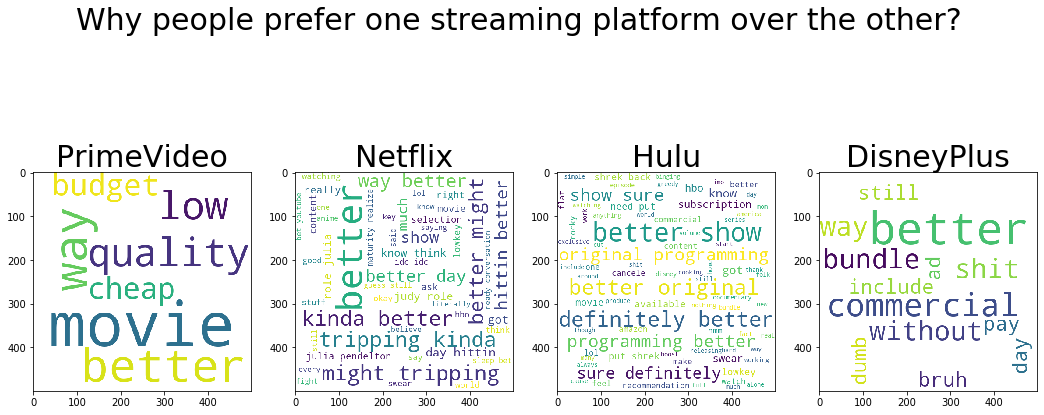

<Figure size 432x288 with 0 Axes>

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plotWordCloud(primevideo_user_remarks)
plt.title('PrimeVideo', fontsize=30)
plt.subplot(142)
plotWordCloud(netflix_user_remarks)
plt.title('Netflix', fontsize=30)
plt.subplot(143)
plotWordCloud(hulu_user_remarks)
plt.title('Hulu', fontsize=30)
plt.subplot(144)
plotWordCloud(disneyplus_user_remarks)
plt.title('DisneyPlus', fontsize=30)
plt.suptitle('Why people prefer one streaming platform over the other?', fontsize = 30)
plt.show()
plt.savefig('WordCloud.jpg')